## Name- Ranjan Pratap Singh                                                      DS2307

# Titanic survived Project
## Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Attribute Information
Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import pickle

### Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\RANJAN\OneDrive\Desktop\titanic_train.csv")

### Exploratory Data Analysis(EDA)  ----->

In [4]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###### Our dataset of titanic surviaval project has the shape of 891 rows and 12 columns . it tells us about people who survived and people who did't. Our target variable is  "Survived " which contain 0 (i.e. not survived )and 1 (i.e. survived). therefore it contains categorical values , so we have classification problem so we will use classification model to train , test and predict the data. 

setting Passangerid as index

In [5]:
df.set_index(df.columns[0], inplace=True)


##### ---->checking for duplicated values

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### Here we observe our datatypes . 
We observe that  our features have  all datatypes -'float64', int and object(string)
#### We can see that there are null values in the coulmn "age", "Cabin" and "Embarked" to check if there can be more null values we will check for white spaces 

In [9]:
#  checking the values counts pf each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")
      

0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      

#### as we can see there are no white spaces in the  dataset  
###### for null values--  for age we use meadin and for Embarked we use mode method 

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

##### as number of nullvlaues are so much in Cabin so we are dropping the Cabin 

In [12]:
df = df.drop('Cabin',axis = 1)

In [13]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Now we can see that there are no null values

In [15]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In description we have count,mean, standard deviation(STD) , minimum(min), 25%,50%(median),75%,maximum(max)

as we can see that there is no negative value so our description of dataset is valid 

number of observations are same in all columns so there is no missing values

if we compare mean with median i.e. 50% we can see in the age it is almost similar so it is normall distributed and in the Fare mean is more than the median so we can say that it is rightly skewed

if we see for outliers we can see that fare can have outliers we will see later in this model 

### Data visualisation 

-- Univariate Analysis

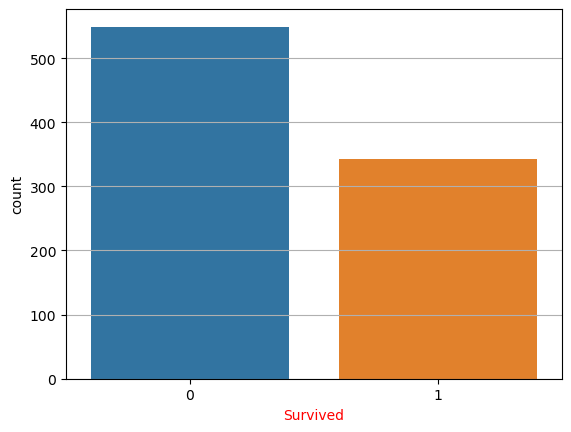

0    549
1    342
Name: Survived, dtype: int64

In [16]:
sns.countplot(x='Survived' , data = df )
plt.xlabel('Survived',color = 'r')
plt.grid(axis ='y')
plt.show()
df.Survived.value_counts()

By the graph we can see that number of not survived(0) people is far more than people who survived(1)  

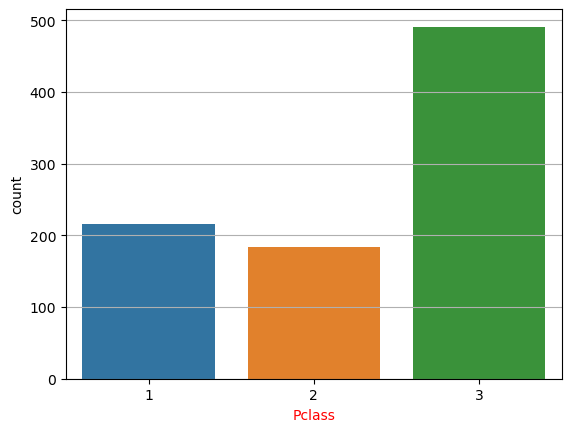

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
sns.countplot(x='Pclass' , data = df )
plt.xlabel('Pclass',color = 'r')
plt.grid(axis ='y')
plt.show()
df.Pclass.value_counts()

In this graph we can see that 3rd class(3) has more number of people then we can see first class(1) has second highest people  and then we have 2nd class(2)

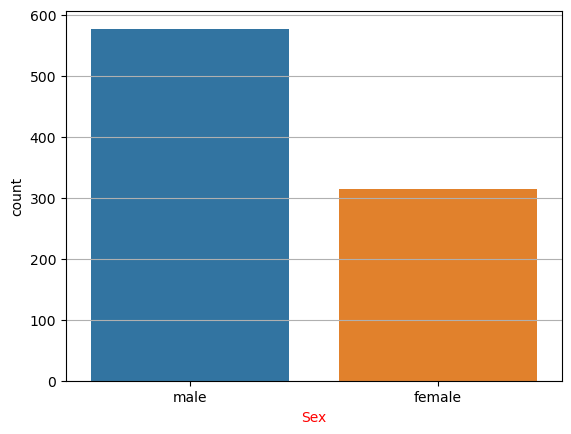

male      577
female    314
Name: Sex, dtype: int64

In [18]:
sns.countplot(x='Sex' , data = df )
plt.xlabel('Sex',color = 'r')
plt.grid(axis ='y')
plt.show()
df.Sex.value_counts()

in this gragph we can see at Titanic number of male are more than number of female.

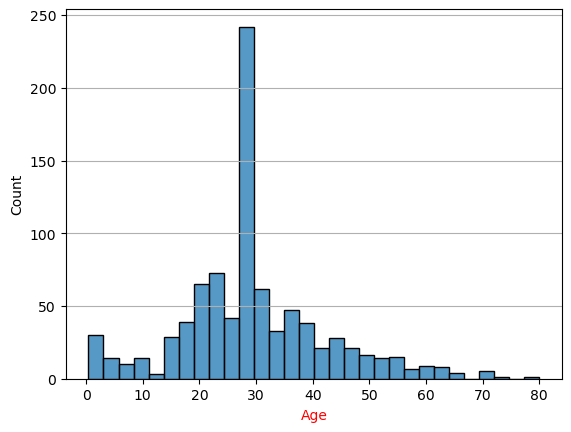

In [19]:
sns.histplot(x='Age' , data = df )
plt.xlabel('Age',color = 'r')
plt.grid(axis ='y')
plt.show()


in the age graph we can see that data is normally distributed 

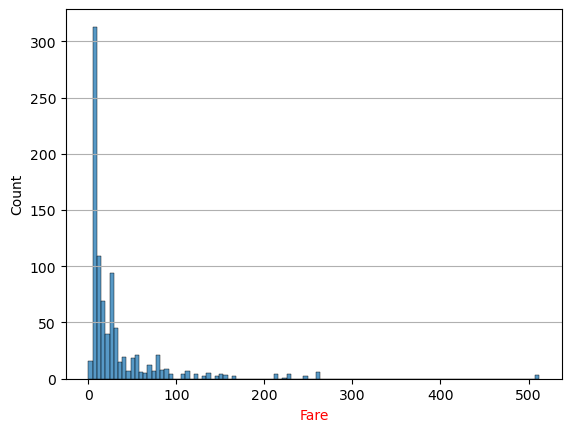

In [20]:
sns.histplot(x='Fare' , data = df )
plt.xlabel('Fare',color = 'r')
plt.grid(axis ='y')
plt.show()


as we observe from earlier that fare is positively or rightly  skewed 

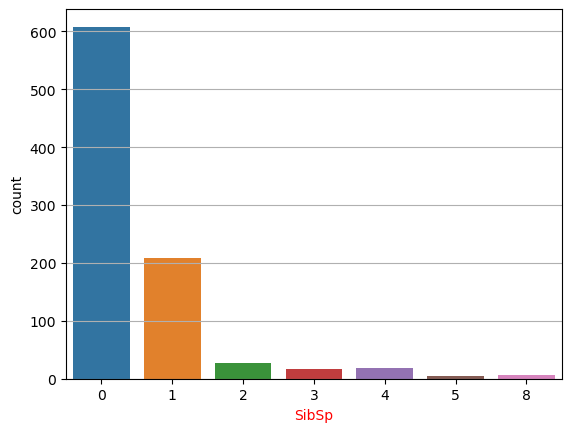

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [21]:
sns.countplot(x='SibSp' , data = df )
plt.xlabel('SibSp',color = 'r')
plt.grid(axis ='y')
plt.show()
df.SibSp.value_counts()

In this graph we can see  that 'Number of Siblings/Spouses Aboard' most of people come alone and very less people come with their 5 siblings/spouses  

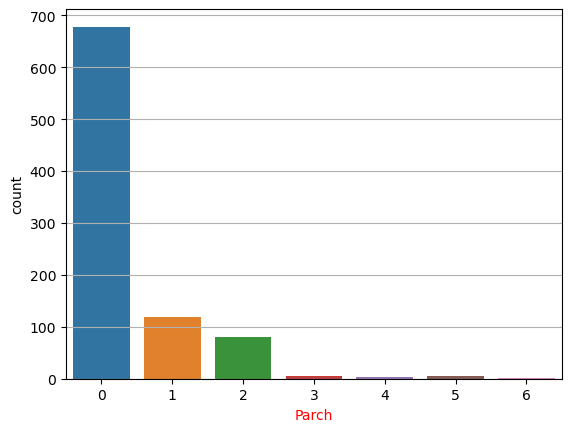

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [22]:
sns.countplot(x='Parch' , data = df )
plt.xlabel('Parch',color = 'r')
plt.grid(axis ='y')
plt.show()
df.Parch.value_counts()

 in this graph we can see that (Number of Parents/Children Aboard) skewed towards right i.e. maximum has 0 and very less has 5 and 6. 

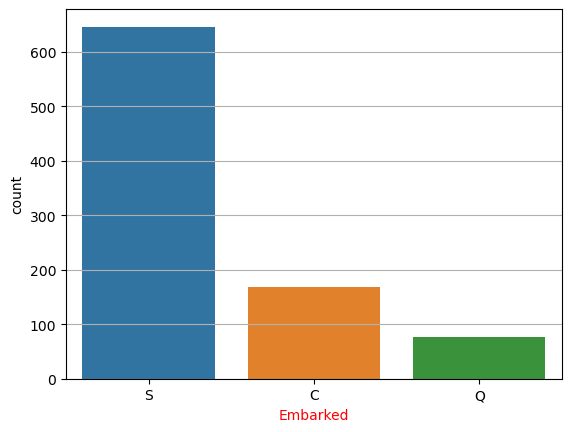

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
sns.countplot(x='Embarked' , data = df )
plt.xlabel('Embarked',color = 'r')
plt.grid(axis ='y')
plt.show()
df.Embarked.value_counts()

in this graph we can see  S , c , Q represents [ Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)]  and most of people boarded from Southampton

-- bivariate analysis

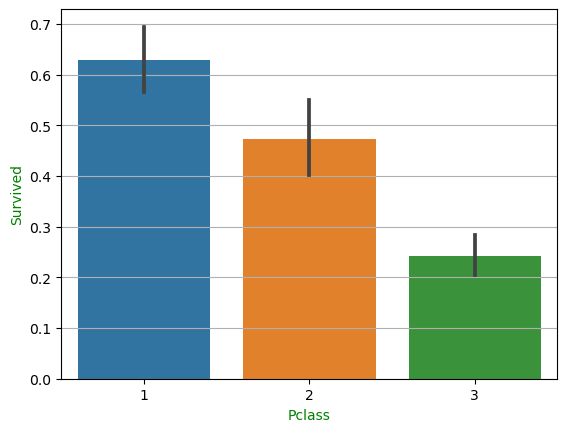

In [24]:
sns.barplot(x ='Pclass', y='Survived', data = df)
plt.xlabel('Pclass',color = 'g')
plt.ylabel('Survived', color = 'g')
plt.grid(axis ='y')
plt.show()

in this graph we can see that even 1st class passenger are less than too , most of survived from 1st class

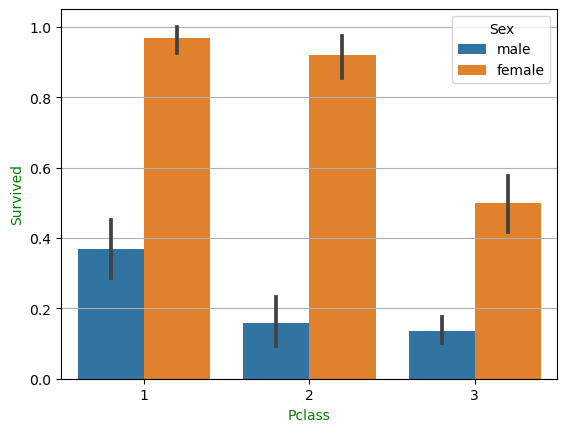

In [25]:
sns.barplot(x ='Pclass', y='Survived', data = df , hue= 'Sex')
plt.xlabel('Pclass',color = 'g')
plt.ylabel('Survived', color = 'g')
plt.grid(axis ='y')
plt.show()

In this graph we can see even in the classes we can see in all classes women survived more than men 

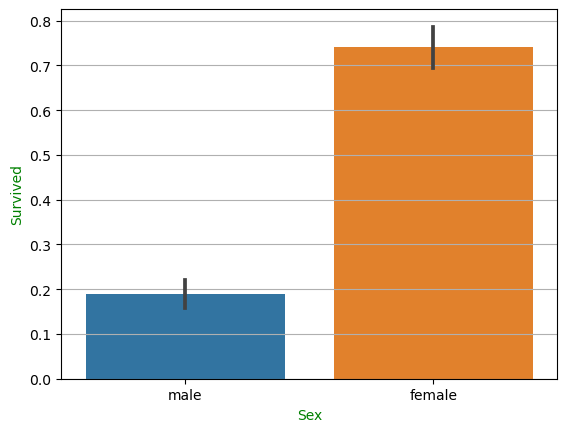

In [26]:
sns.barplot(x ='Sex', y='Survived', data = df)
plt.xlabel('Sex',color = 'g')
plt.ylabel('Survived', color = 'g')
plt.grid(axis ='y')
plt.show()

In this graph that over all too women survived much more than men

By seeing all three graphs we can clearly see that women surviveed more in every aspect  

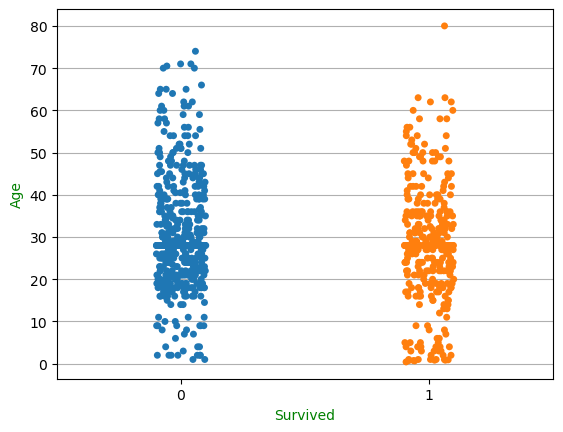

In [27]:
sns.stripplot(y ='Age', x='Survived', data = df)
plt.ylabel('Age',color = 'g')
plt.xlabel('Survived', color = 'g')
plt.grid(axis ='y')
plt.show()

in this graph before 50 there is no such difference between survived and not survived but as we go above 50 then we can see more people died and after 65 approx most of people died except for outliers 

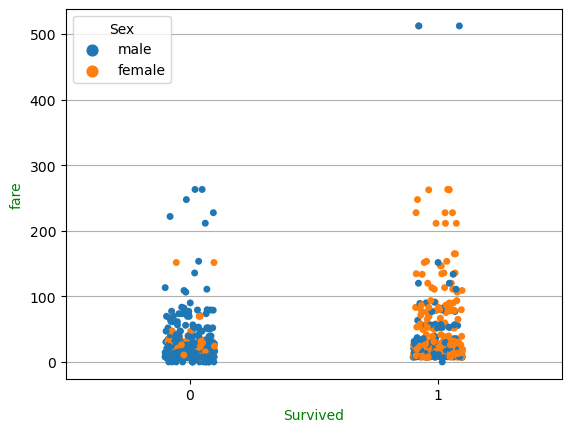

In [28]:
sns.stripplot(y ='Fare', x='Survived', data = df , hue = 'Sex')
plt.ylabel('fare',color = 'g')
plt.xlabel('Survived', color = 'g')
plt.grid(axis ='y')
plt.show()

in this graph we can see two things first women relatively spent more in tickets and second there is very little difference but as fare goes up people survived little more 

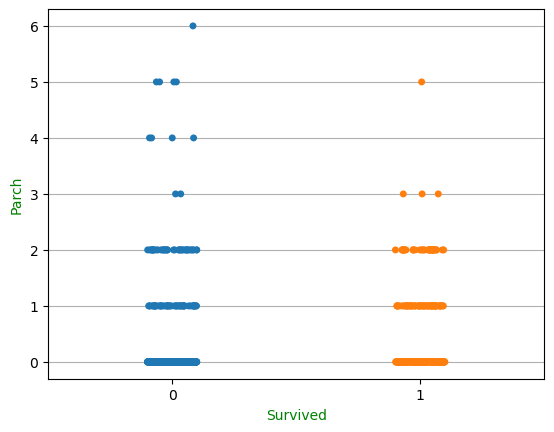

In [29]:
sns.stripplot(y ='Parch', x='Survived', data = df)
plt.ylabel('Parch',color = 'g')
plt.xlabel('Survived', color = 'g')
plt.grid(axis ='y')
plt.show()

in this graph we can not see a clear difference between survived and not survived based on Parch 

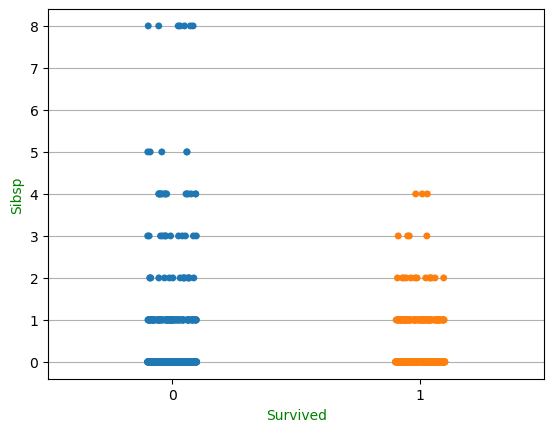

In [30]:
sns.stripplot(y ='SibSp', x='Survived', data = df)
plt.ylabel('Sibsp',color = 'g')
plt.xlabel('Survived', color = 'g')
plt.grid(axis ='y')
plt.show()

### -- Checking for Outliers

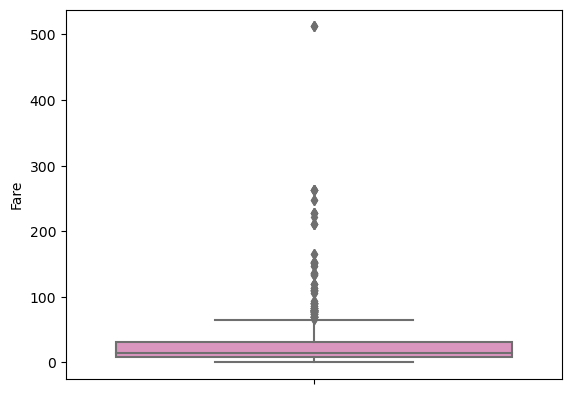

In [31]:
sns.boxplot( y = df['Fare'] , palette = 'Set2_r')
plt.show()

We can see there are outliers in the Fare

In [32]:
high_fare = df.loc[df['Fare'] > 500]
high_fare

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [33]:
index1 = [259,680,738]
df = df.drop(index1)

In [34]:
df.reset_index(drop=True, inplace=True)


here we remove the extreme outliers but not all as if we remove more outliers our data becomes retalively small and is not much significant for predicting

In [35]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
883,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
884,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
885,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
886,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


 ### -- Checking for Skewness

In [36]:
df.skew()

Survived    0.487605
Pclass     -0.640238
Age         0.514256
SibSp       3.688909
Parch       2.748427
Fare        3.187877
dtype: float64

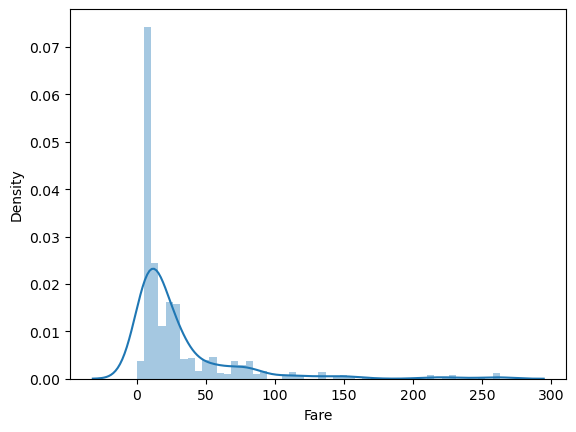

In [37]:
sns.distplot(df['Fare'])
plt.show()

here we can see that Fare is rughtly skewed and SibSp and Parch  are categorical data so we will use some methods to remove the skewness in Fare

In [38]:
df['Fare']=np.cbrt(df['Fare'])

In [39]:
df.skew()

Survived    0.487605
Pclass     -0.640238
Age         0.514256
SibSp       3.688909
Parch       2.748427
Fare        0.999824
dtype: float64

Here after using cuberoot we still can see moderate skewness in the fare but we will continue with that much skeweness

##### Encoding features

In [40]:
df['Sex'] = df['Sex'].replace({'female': 0, 'male': 1})

In [41]:
df['Embarked'] = df['Embarked'].replace({'C': 0, 'S': 1,'Q':2})

### checking for correlation 

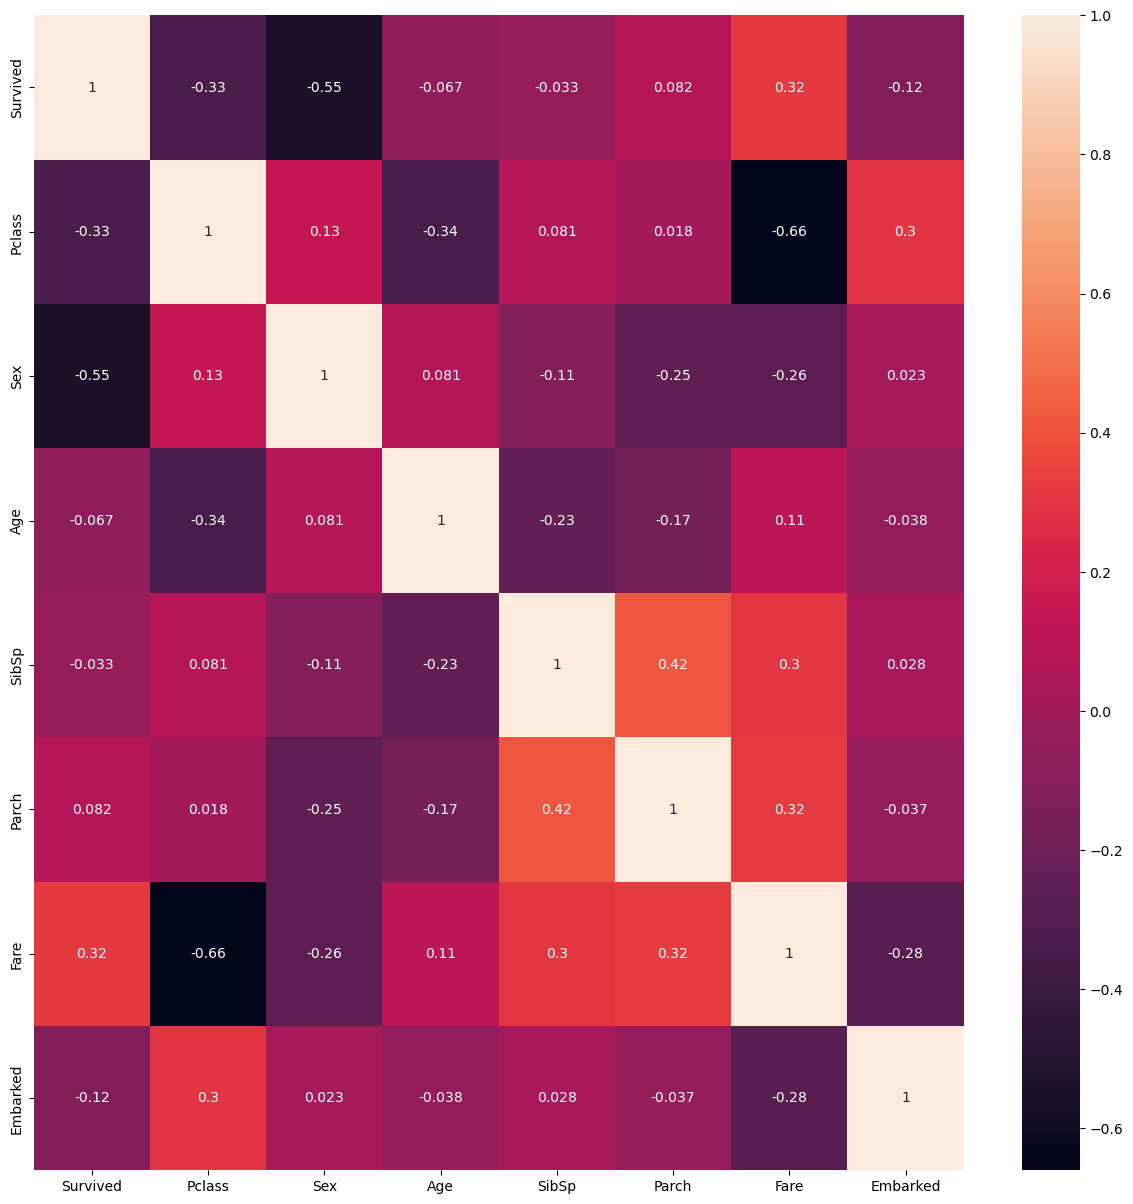

In [42]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation , annot = True)
plt.show()

here we can see that Parch and Fare have positive correaltion with the target variable and Pclass, Sex ,Age , SibSp , Embarked have negative correaltion with target variable 

In this heat map we can see that Parch , Age , SibSp have very less correaltion with the target variable (i.e. <0.1) but since we have less features and due to senstivity of data we will choose  not to  remove any features.

If we see correlation then we can see that there is not much correlation among features so we can say that there may not be problem of multicollinearity

### Seperating features and target variable

In [43]:
X = df.drop(['Survived','Name','Ticket'], axis=1)
Y = df['Survived']


In [44]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,1.935438,1
1,1,0,38.0,1,0,4.146318,0
2,3,0,26.0,0,0,1.993730,1
3,1,0,35.0,1,0,3.758647,1
4,3,1,35.0,0,0,2.004158,1
...,...,...,...,...,...,...,...
883,2,1,27.0,0,0,2.351335,1
884,1,0,19.0,0,0,3.107233,1
885,3,0,28.0,1,2,2.862294,1
886,1,1,26.0,0,0,3.107233,0


### Scaling using Standard Scalar

In [45]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(X), columns = X.columns)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.824123,0.737799,-0.563437,0.430627,-0.473353,-0.789413,0.193347
1,-1.575290,-1.355382,0.664528,0.430627,-0.473353,1.358096,-1.757703
2,0.824123,-1.355382,-0.256446,-0.475527,-0.473353,-0.732792,0.193347
3,-1.575290,-1.355382,0.434285,0.430627,-0.473353,0.981536,0.193347
4,0.824123,0.737799,0.434285,-0.475527,-0.473353,-0.722663,0.193347
...,...,...,...,...,...,...,...
883,-0.375584,0.737799,-0.179698,-0.475527,-0.473353,-0.385438,0.193347
884,-1.575290,-1.355382,-0.793681,-0.475527,-0.473353,0.348794,0.193347
885,0.824123,-1.355382,-0.102950,0.430627,2.006516,0.110876,0.193347
886,-1.575290,0.737799,-0.256446,-0.475527,-0.473353,0.348794,-1.757703


## Oversampling 
 for making the data balanced

In [46]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(X,Y)

In [47]:
y1.value_counts()

0    549
1    549
Name: Survived, dtype: int64

## Creating train test Split

In [48]:
from sklearn.model_selection import train_test_split
for i in range(1,100):
    X_train,X_test,Y_train,Y_test =train_test_split (x1,y1, test_size = 0.25 , random_state = i)

#### importing necessary libraries for models

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

## Models

#### AdaBoostClassifier

In [50]:
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
y_pred = abc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8420413122721749


In [51]:
y_pred_testABC  = abc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testABC ) # checking test data 
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.7709090909090909


In [52]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testABC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       146
           1       0.74      0.79      0.76       129

    accuracy                           0.77       275
   macro avg       0.77      0.77      0.77       275
weighted avg       0.77      0.77      0.77       275



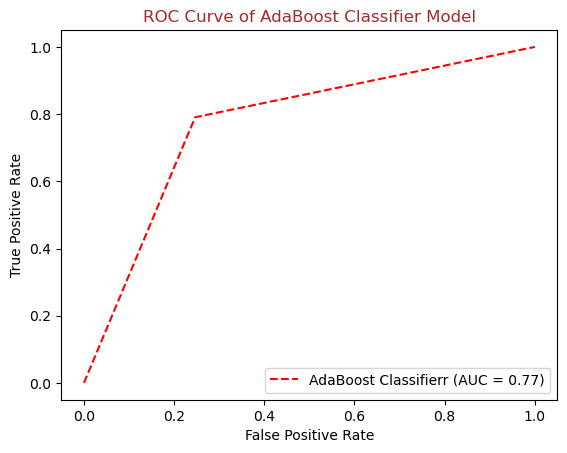

 Here we can area under the curve is --> 0.7720611659764256


In [53]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testABC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="AdaBoost Classifierr") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of AdaBoost Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### RandomForest Classifier 

In [54]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.9842041312272175


In [55]:
y_pred_testRFC  = rfc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testRFC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8181818181818182


In [56]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testRFC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       146
           1       0.81      0.80      0.80       129

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275



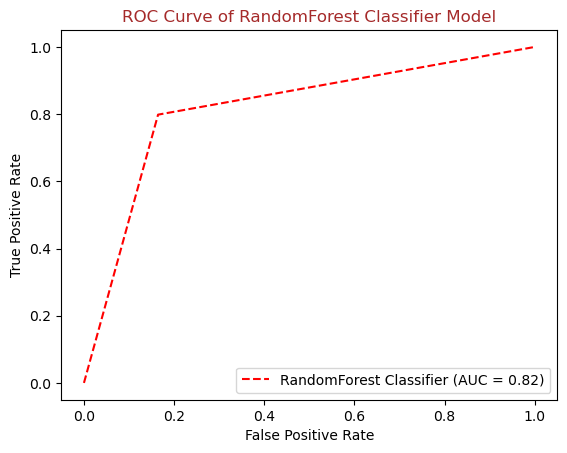

 Here we can area under the curve is --> 0.8170330253796325


In [57]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testRFC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="RandomForest Classifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of RandomForest Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### Logistic Regression

In [58]:
log_R =LogisticRegression()
log_R.fit(X_train, Y_train)
y_pred = log_R.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8068043742405833


In [59]:
y_pred_testLR  = log_R.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testLR ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.7527272727272727


In [60]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testLR))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.76      0.77      0.77       146
           1       0.74      0.73      0.73       129

    accuracy                           0.75       275
   macro avg       0.75      0.75      0.75       275
weighted avg       0.75      0.75      0.75       275



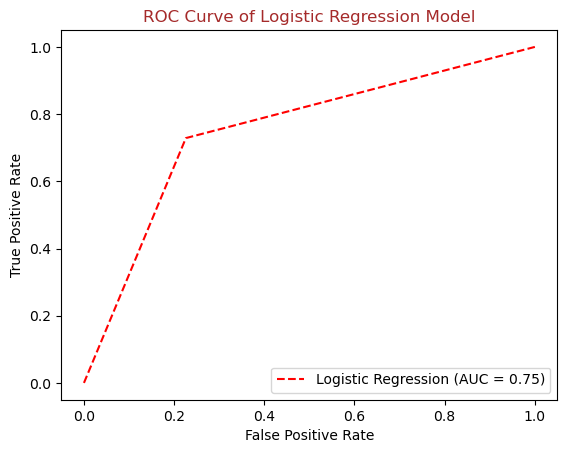

 Here we can area under the curve is --> 0.7513273866411808


In [61]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testLR)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="Logistic Regression") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of Logistic Regression Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### Support Vector Model

In [62]:
SVM = SVC()
SVM.fit(X_train, Y_train)
y_pred = SVM.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8444714459295262


In [63]:
y_pred_testSVM  = SVM.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testSVM ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.7818181818181819


In [64]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testSVM))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       146
           1       0.75      0.80      0.77       129

    accuracy                           0.78       275
   macro avg       0.78      0.78      0.78       275
weighted avg       0.78      0.78      0.78       275



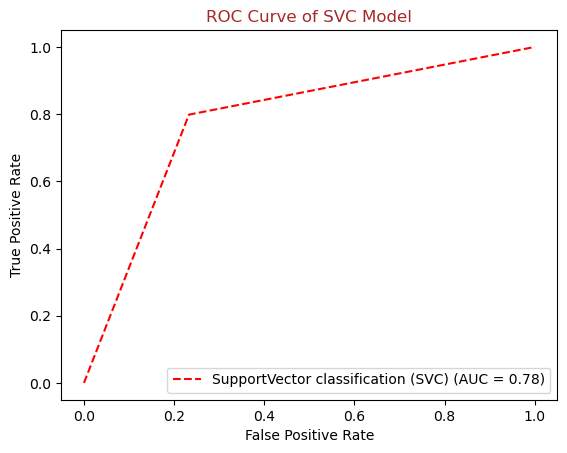

 Here we can area under the curve is --> 0.7827864500371668


In [65]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testSVM)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="SupportVector classification (SVC)") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of SVC Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### GradientBoosting Classifier

In [66]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
y_pred = GBC.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.9027946537059538


In [67]:
y_pred_testGBC  = GBC.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testGBC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8072727272727273


In [68]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testGBC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       146
           1       0.81      0.78      0.79       129

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275



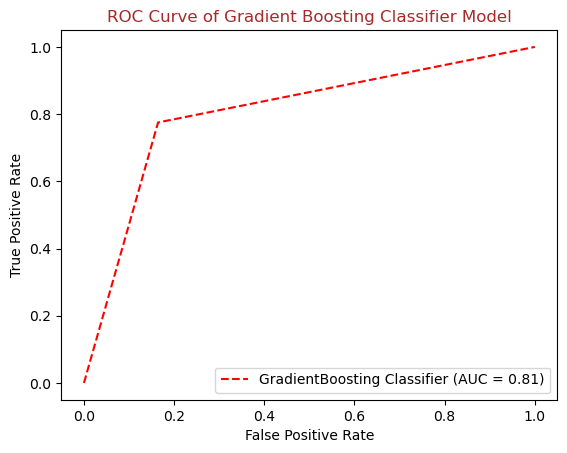

 Here we can area under the curve is --> 0.8054051184028885


In [69]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testGBC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="GradientBoosting Classifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of Gradient Boosting Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### KNN

In [70]:
KNN =KNeighborsClassifier()
KNN.fit(X_train, Y_train)
y_pred = KNN.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8809234507897934


In [71]:
y_pred_testKNN  = KNN.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testKNN ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.7709090909090909


In [72]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testKNN))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       146
           1       0.74      0.80      0.77       129

    accuracy                           0.77       275
   macro avg       0.77      0.77      0.77       275
weighted avg       0.77      0.77      0.77       275



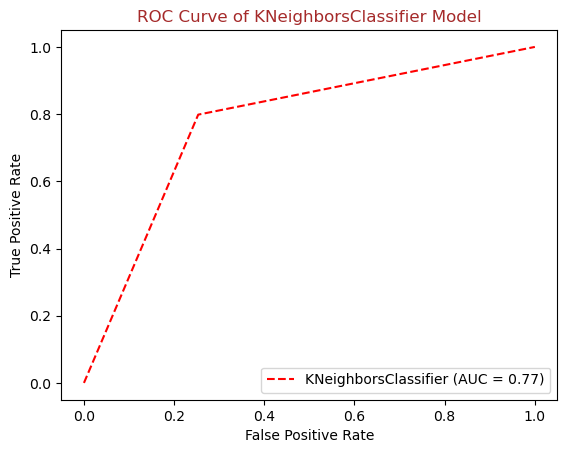

 Here we can area under the curve is --> 0.7725124774344272


In [73]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testKNN)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="KNeighborsClassifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of KNeighborsClassifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

we will further understand which model is best predicting by using cross validation 

## Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
cscore1 = cross_val_score(rfc,x1,y1)
print('Cscore for RandomForest Classifier-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testRFC)-cscore1.mean())

Cscore for RandomForest Classifier->  [0.79090909 0.82727273 0.82727273 0.87671233 0.85844749]
mean of cscore->  0.8361228725612287
difference between accuracy and cross validation score is -0.017941054379410515


In [76]:
cscore2 = cross_val_score(KNN,x1,y1)
print('Cscore for Kneighbours Classifier ',cscore2)
print('mean of cscore-> ',cscore2.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testKNN)-cscore2.mean())

Cscore for Kneighbours Classifier  [0.78181818 0.83636364 0.79090909 0.85844749 0.85388128]
mean of cscore->  0.8242839352428394
difference between accuracy and cross validation score is -0.053374844333748506


In [77]:
cscore3 = cross_val_score(abc,x1,y1)
print('Cscore for AdaBoost Classifier-> ',cscore3)
print('mean of cscore-> ',cscore3.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testABC)-cscore3.mean())

Cscore for AdaBoost Classifier->  [0.74545455 0.83636364 0.78181818 0.87214612 0.79908676]
mean of cscore->  0.8069738480697385
difference between accuracy and cross validation score is -0.03606475716064761


In [78]:
cscore4 = cross_val_score(GBC,x1,y1)
print('Cscore for Gradient Boost Classifier -> ',cscore4)
print('mean of cscore-> ',cscore4.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testGBC)-cscore4.mean())

Cscore for Gradient Boost Classifier ->  [0.80454545 0.82272727 0.82272727 0.89041096 0.85388128]
mean of cscore->  0.8388584474885846
difference between accuracy and cross validation score is -0.03158572021585737


In [79]:
cscore5 = cross_val_score(SVM,x1,y1)
print('Cscore for SUpport Vector Machine-> ',cscore5)
print('mean of cscore-> ',cscore5.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testSVM)-cscore5.mean())

Cscore for SUpport Vector Machine->  [0.78181818 0.81818182 0.77727273 0.83105023 0.82648402]
mean of cscore->  0.806961394769614
difference between accuracy and cross validation score is -0.02514321295143218


In [80]:
cscore6 = cross_val_score(log_R,x1,y1)
print('Cscore for Logistic Regression',cscore6)
print('mean of cscore-> ',cscore6.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testLR)-cscore6.mean())

Cscore for Logistic Regression [0.75909091 0.8        0.74545455 0.82191781 0.78995434]
mean of cscore->  0.7832835201328352
difference between accuracy and cross validation score is -0.03055624740556251


##### after analysing cross value score we can conclude RandomForest classifier  accuracy is good i.e. 84%approx with least deviation of only 1% so we choose Random Forest Classifier

## Hyper parameter tuning

In [82]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [83]:
# Choosing parameters for our grid search CV
parameters = { 'criterion': ["gini", "entropy", "log_loss"],
               'max_depth': [None, 10, 20, 30],  
               'n_jobs': [-1, 2, None],
               'n_estimators': [100, 200, 300],
               'min_samples_split': [2, 5, 10],
               }



In [84]:
GSC = GridSearchCV(RandomForestClassifier(),parameters,cv= 5)

In [85]:
GSC.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'n_jobs': [-1, 2, None]})

In [86]:
GSC.best_params_ 

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 5,
 'n_estimators': 100,
 'n_jobs': None}

In [87]:
rfc_final = RandomForestClassifier(criterion= 'gini',max_depth= None, n_estimators = 100, n_jobs = None , min_samples_split= 5 )
rfc_final.fit(X_train, Y_train)
y_pred = rfc_final.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.9586877278250304


In [88]:
y_pred_testRFC  = rfc_final.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testRFC ) # checking test data 
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.8363636363636363


we can see prediction score increases from 81% to 83.63%

## Model Saving

In [89]:
import joblib
joblib.dump(rfc_final,'model for Titanic ')

['model for Titanic ']

# Prediction 

In [90]:
mymodel = joblib.load('model for titanic')
prdt = mymodel.predict(X_test)
prdt

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [91]:
Orginal = np.array(Y_test)
data1 = pd.DataFrame({'predicted': prdt,'original':Orginal})
data1

,predicted,original
0,0,0
1,1,0
2,1,1
3,0,0
4,1,1
...,...,...
270,0,0
271,0,0
272,1,1
273,0,0


--we can see the prediction based on the model we build